### Background
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees that causes the remaining hive colonies to collapse. Speculation on the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Nowadays, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. **This dataset provides insight into honey production supply and demand in America from 1998 to 2016.**

### Objective: 
To visualize how honey production has changed in the United States. 

Key questions to be answered:

* How has honey production yield changed over the years from 1998 to 2016?
* Over time, what have been the major production trends across the states?
* Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production that could be tied to demand, changed every year?

### Dataset:

* **State**: Various states in the U.S.
* **year**: Year of production
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: honey yield per colony. The unit is in pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.


### Importing the necessary packages

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

import warnings
warnings.filterwarnings('ignore')

### Read `honeyproduction` Dataset and Data Overview

In [2]:
honeyprod = pd.read_csv("data/5_honeyproduction1998-2016.csv")

In [3]:
# check the data types and null values in the dataset
honeyprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


- *One object datatype column and 7 numerical datatypes*
- *No null values*

In [4]:
# check the number of rows and columns in the dataset
print(f'Dataset has {honeyprod.shape[0]} rows and {honeyprod.shape[1]} columns.')

Dataset has 785 rows and 8 columns.


In [5]:
# check sample of the dataset
honeyprod.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
29,Ohio,18000.00,78,1404000.00,702000.00,0.83,1165000.00,1998
515,Illinois,9000.00,41,369000.00,92000.00,2.78,1026000.00,2010
369,North Carolina,10000.00,50,500000.00,215000.00,1.57,785000.00,2006
143,Louisiana,45000.00,106,4770000.00,572000.00,0.60,2862000.00,2001
721,Michigan,90000.00,58,5220000.00,1984000.00,2.44,12737000.00,2015


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various attributes related to production*
- *Most of the columns are numerical in nature*

### Getting the statistical summary for the dataset

In [6]:
honeyprod.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,785.00,61686.62,92748.94,2000.00,9000.00,26000.00,65000.00,510000.00
yieldpercol,785.00,60.58,19.43,19.00,46.00,58.00,72.00,136.00
totalprod,785.00,4140956.69,6884593.86,84000.00,470000.00,1500000.00,4096000.00,46410000.00
stocks,785.00,1257629.30,2211793.82,8000.00,119000.00,391000.00,1380000.00,13800000.00
priceperlb,785.00,1.70,0.93,0.49,1.05,1.48,2.04,7.09
prodvalue,785.00,5489738.85,9425393.88,162000.00,901000.00,2112000.00,5559000.00,83859000.00
year,785.00,2006.82,5.49,1998.00,2002.00,2007.00,2012.00,2016.00


- *The number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000*
- *The average number of colonies is close to the 75% percentile of the data, indicating a right skew*
- *As expected, the standard deviation of numcol columns is very high*
- *Yield per colony also has a huge spread ranging from 19 pounds to 136 pounds, but the average value is close to the median of the data, which means the data is evenly distributed across this column*
- *In fact, all the variables seem to have a huge range, we will have to investigate further if this spread is mainly across different states or varies in the same state over the years*


Since we have mostly numerical variables, let's check the distribution of each variable using Visualisation to understand nature of data 

### Univariate Analysis

In [7]:
# Function to create a histogram and boxplot combined for visualization of numerical features
def histogram_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=True, ax=ax_hist2, color='skyblue')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

`numcol` spread of number of honey-producing colonies.

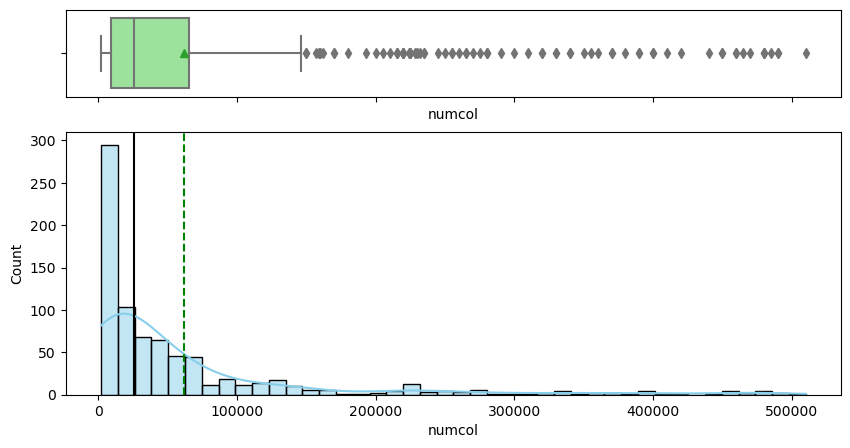

In [8]:
histogram_boxplot(honeyprod,'numcol', figsize=(10, 5))

Observations: 
- *Most of the data is concentrated within the range of 0-50000, which means most of the states have around 50000 producing honey*
- *The distribution is **right-skewed** with a lot of outliers towards the higher end*
- *The median honey-producing colonies is nearly 25000*

`yieldpercol` spread of honey yields per colony. Unit is pounds

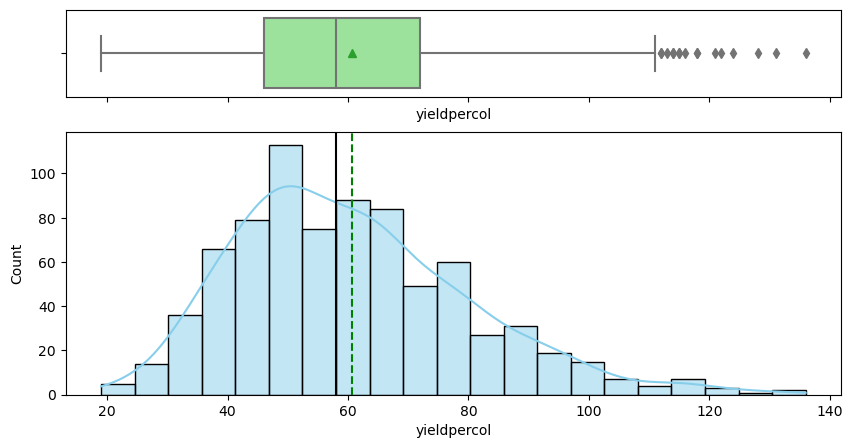

In [9]:
histogram_boxplot(honeyprod,'yieldpercol', figsize=(10, 5))

*Observations:*
- *Yield per colony of honey has a **right-skewed** distribution with some outliers towards the higher end*
- *The median yield per colony is close to **60 pounds**.*

`priceperlb` distribution of cost of honey per pound

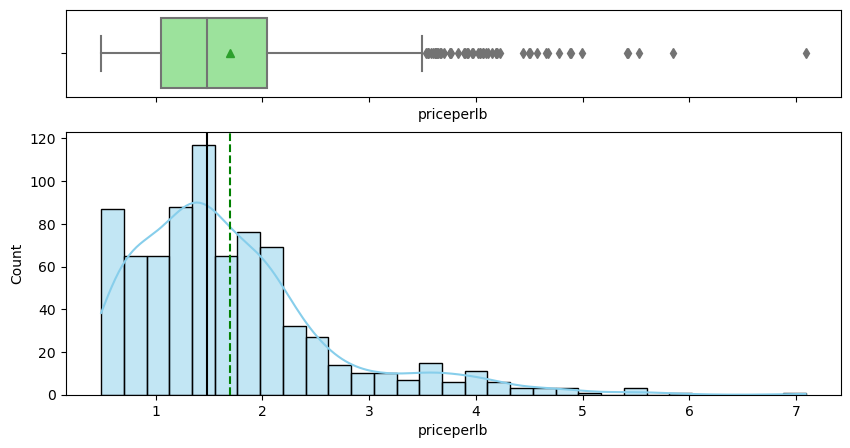

In [10]:
histogram_boxplot(honeyprod,'priceperlb')

*Observations:*
- *Most of the honey is priced between 0-2 dollars*
- *Price per pound of honey has a right-skewed distribution with a lot of outliers towards the higher end, possibly some of the honey was of great quality*
- *The median price per pound of honey is 1.5 dollars*

`stocks` Distribution of stocks held by producers.

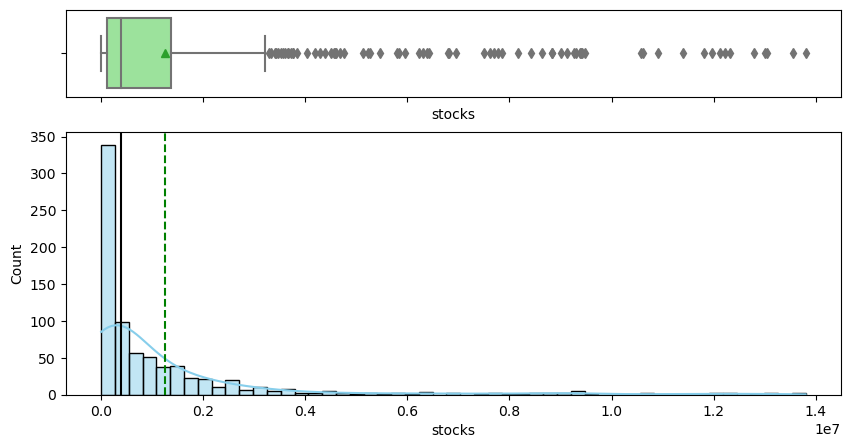

In [11]:
histogram_boxplot(honeyprod,'stocks')

*Observations:*
- *Stocks held by producers also have a right-skewed distribution with a lot of outliers towards the higher end.*
- *The median value of stocks held by producers is close to 118.5k lbs*
- *The data ranges from 8000 lbs to 13.8M lbs which implies that the dispersion is very high in the data. In simple terms, the data of stocks held by producers is highly scattered.*

### Multivariate Analysis

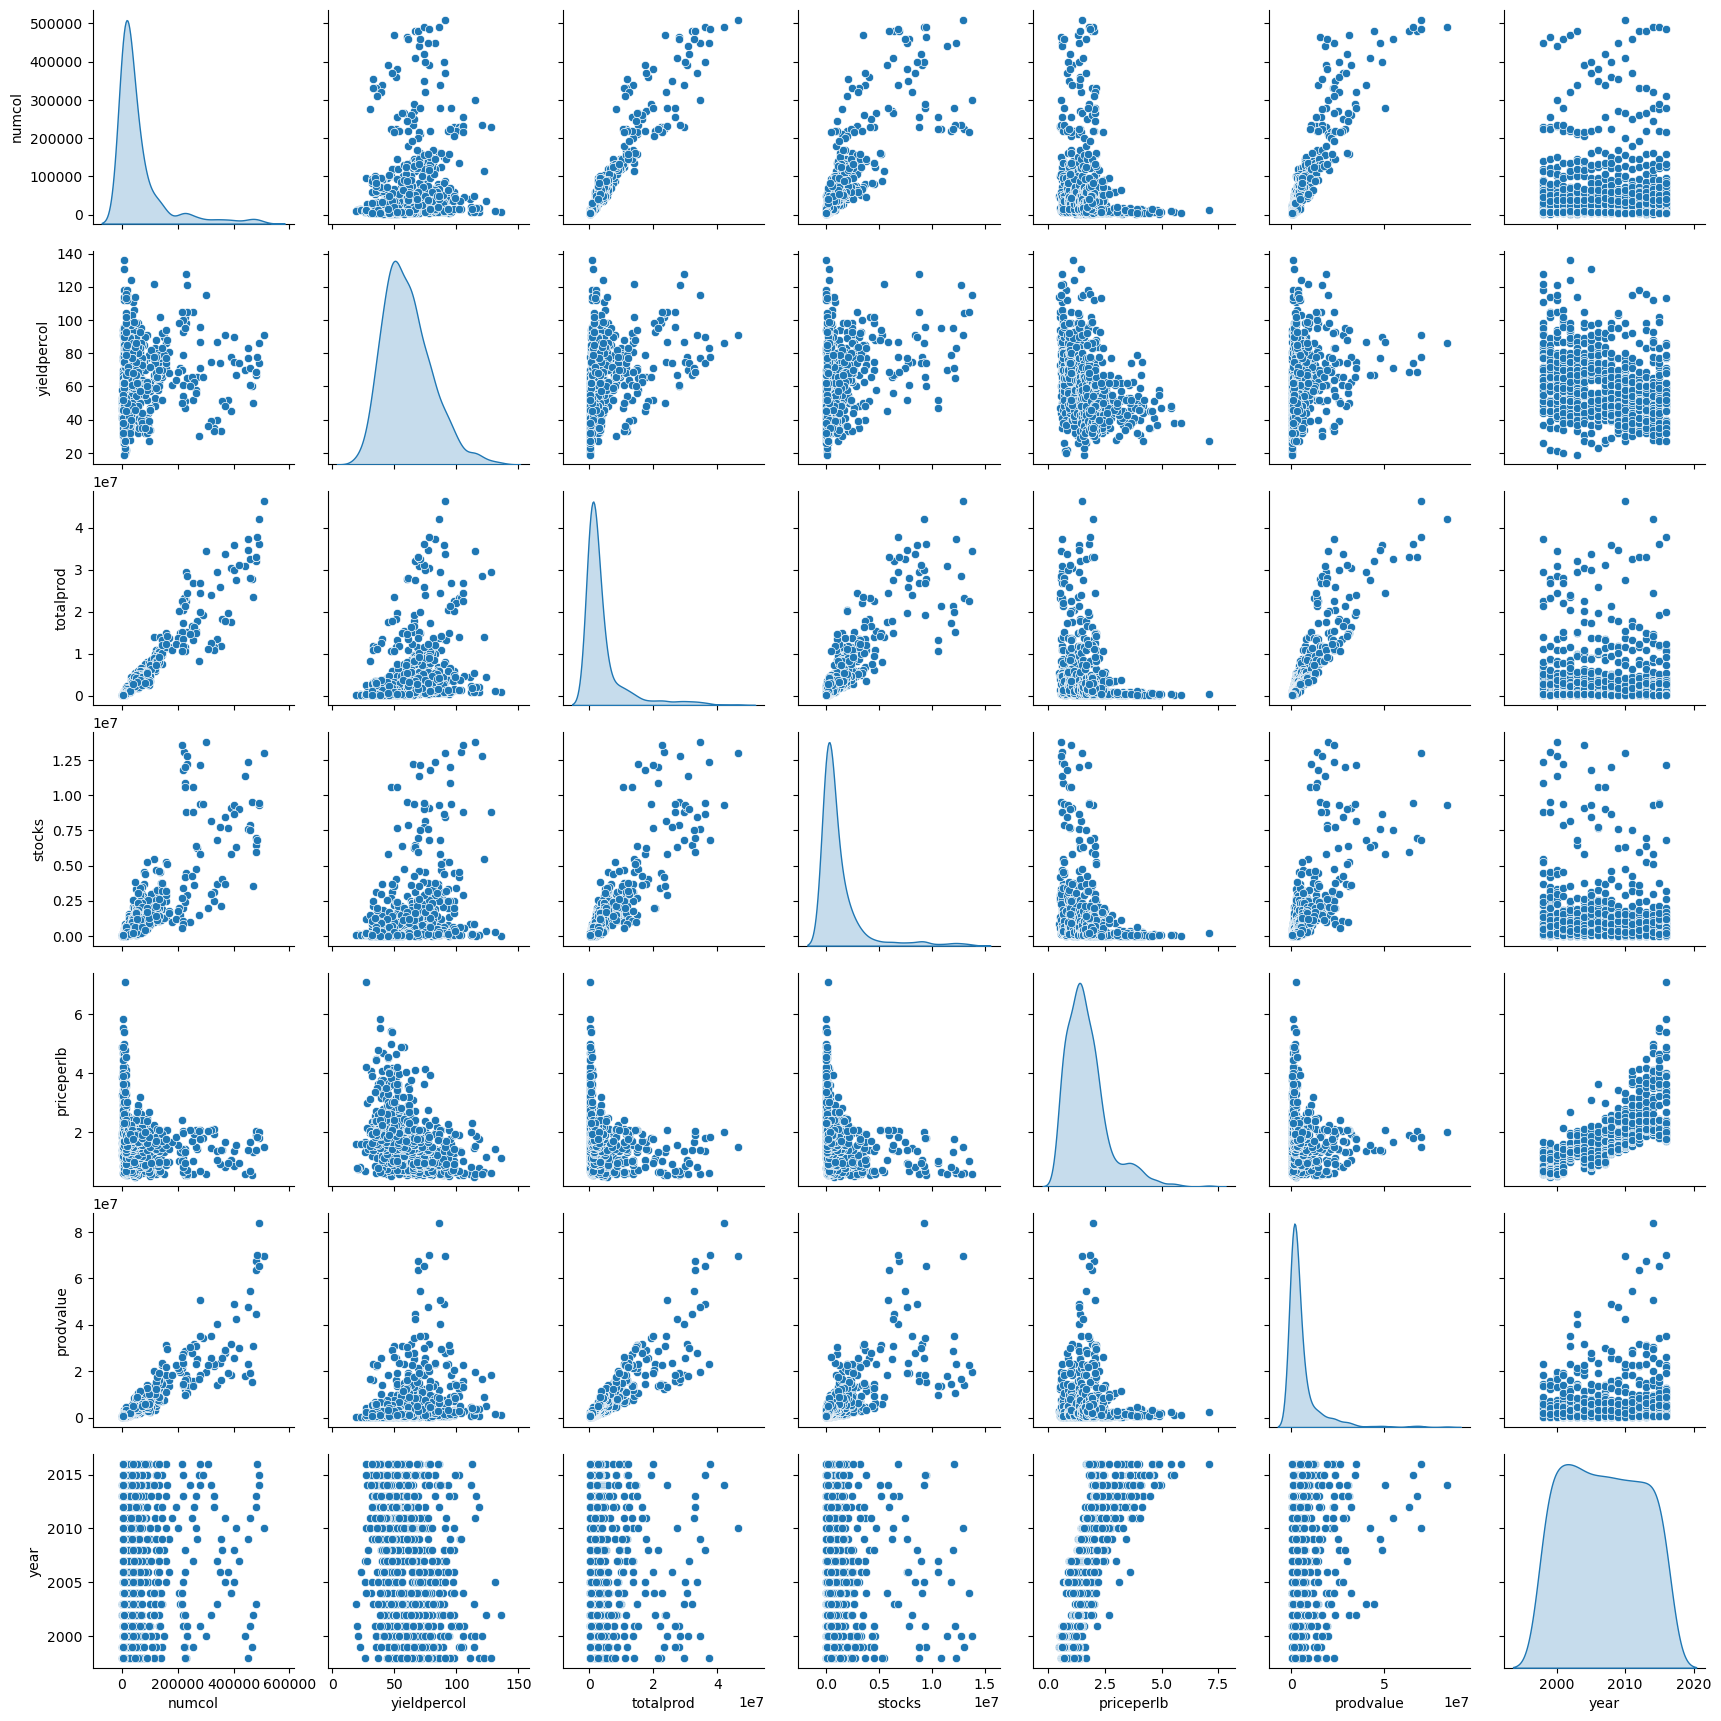

In [12]:
# Plotting pairplot
sns.pairplot(honeyprod, diag_kind="kde");

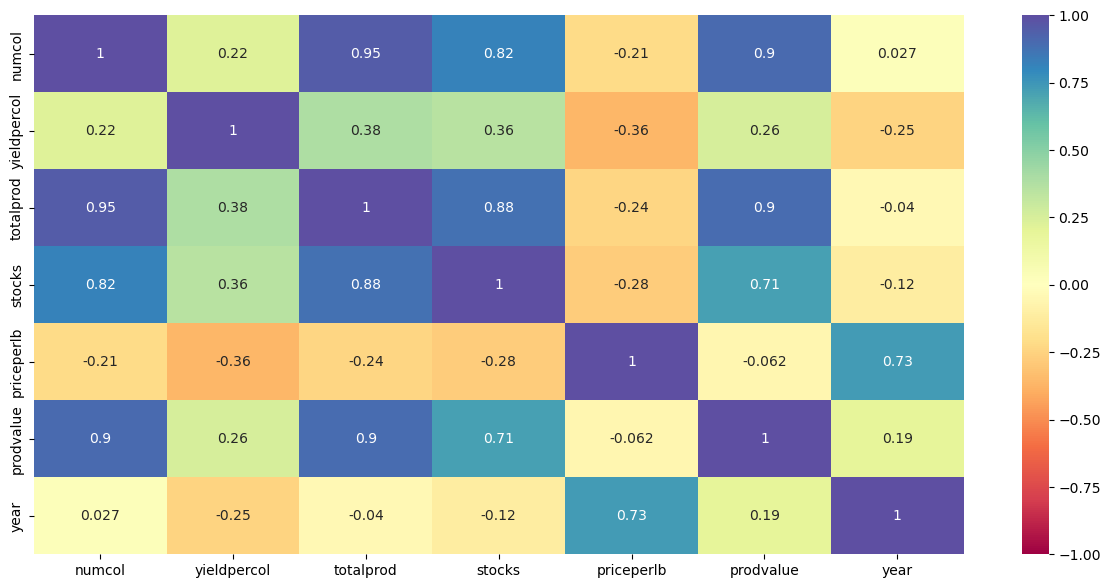

In [13]:
# Plotting Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(honeyprod[honeyprod.columns[1:]].corr(), vmin = -1, vmax = 1, annot=True, cmap="Spectral");

*Observations:*
- *Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other*
- *Yield per colony does not have a high correlation with any of the features that we have in our dataset* 
- *Same is the case with priceperlb*
- *Determining the factors influencing per colony yield and price per pound of honey would need further investigation*  

Similarly, we can explore the other two variables as well i.e. `state` and `year` columns

`state` and `year`

In [14]:
honeyprod['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [15]:
honeyprod['state'].nunique()

44

So, 44 states are producing honey in total.

**Let's extract which states have maximum and minimum honey production**

In [16]:
#top 10 states producing maximum honey
top10_totalprod= honeyprod.groupby('state')[['totalprod']].sum().sort_values('totalprod', ascending=False).reset_index().head(10) 
top10_totalprod

,state,totalprod
0,North Dakota,624435000.00
1,California,390315000.00
2,South Dakota,344361000.00
3,Florida,297798000.00
4,Montana,210125000.00
5,Minnesota,175432000.00
6,Texas,137832000.00
7,Wisconsin,95067000.00
8,Michigan,93788000.00
9,Idaho,78362000.00


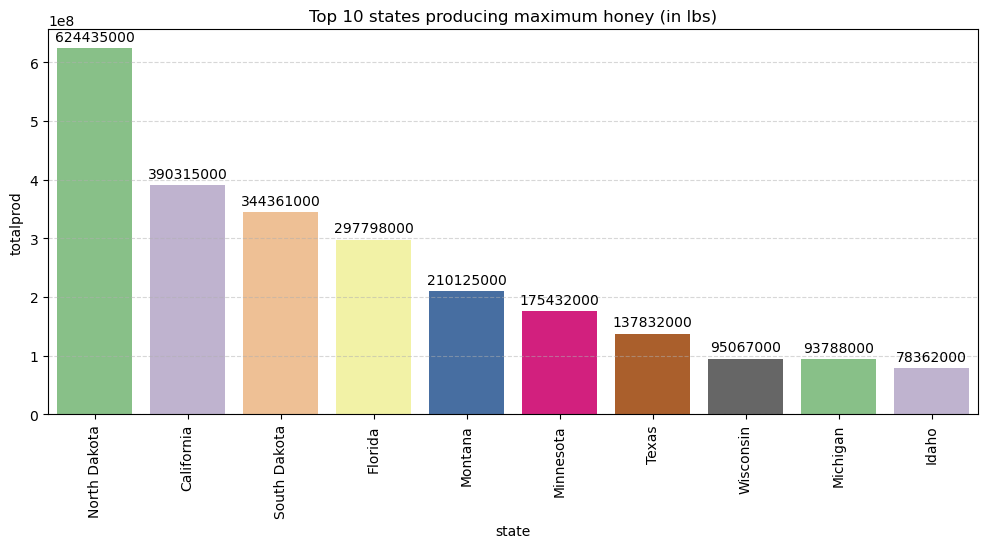

In [17]:
# Plotting Bar graph
plt.figure(figsize=(12,5))
ax = sns.barplot(data=top10_totalprod,x = 'state', y='totalprod', palette = 'Accent');
plt.title('Top 10 states producing maximum honey (in lbs)')
# Print count on top of the bar
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90);

Similarly, we can create a barplot the bottom 10 states -

In [18]:
#last 10 states producing minimum honey
bottom10_totalprod= honeyprod.groupby('state')[['totalprod']].sum().sort_values('totalprod', ascending=False).reset_index().tail(10) 
bottom10_totalprod

,state,totalprod
34,New Mexico,7147000.00
35,Vermont,6720000.00
36,West Virginia,5615000.00
37,Maine,5256000.00
38,Virginia,4837000.00
39,Nevada,4832000.00
40,Kentucky,4263000.00
41,South Carolina,3174000.00
42,Maryland,1266000.00
43,Oklahoma,1207000.00


We have extracted the total honey production for bottom 10 states. Similarly let's represent these values using a barplot.

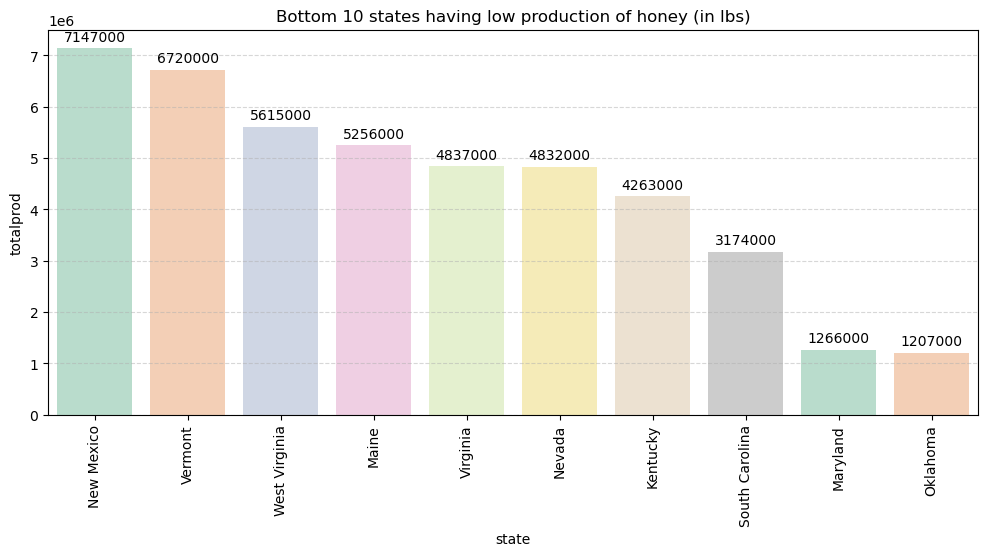

In [19]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=bottom10_totalprod,x = 'state', y='totalprod', palette = 'Pastel2');
plt.title('Bottom 10 states having low production of honey (in lbs)')
for bar in ax.patches: # Print count on top of the bar
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90);

*Observations:*
- *North Dakota is producing the maximum amount of honey followed by California and South Dakota as compared to other states*
- *Oklahoma is producing the least amount of honey in total followed by Maryland and South California*

**Similarly we can check the which state is producing costliest and cheapest honey on an average basis**

In [20]:
#top 10 states having maximum price per pound based on expanded sales
top10_price= honeyprod.groupby('state')[['priceperlb']].sum().sort_values('priceperlb', ascending=False).reset_index().head(10) 
top10_price

,state,priceperlb
0,Virginia,55.36
1,Illinois,50.47
2,North Carolina,47.56
3,Kentucky,46.51
4,Tennessee,44.64
5,West Virginia,43.61
6,New Jersey,41.25
7,Vermont,40.43
8,Maine,38.42
9,Ohio,38.26


Virginia is producing the costliest honey on an average basis.

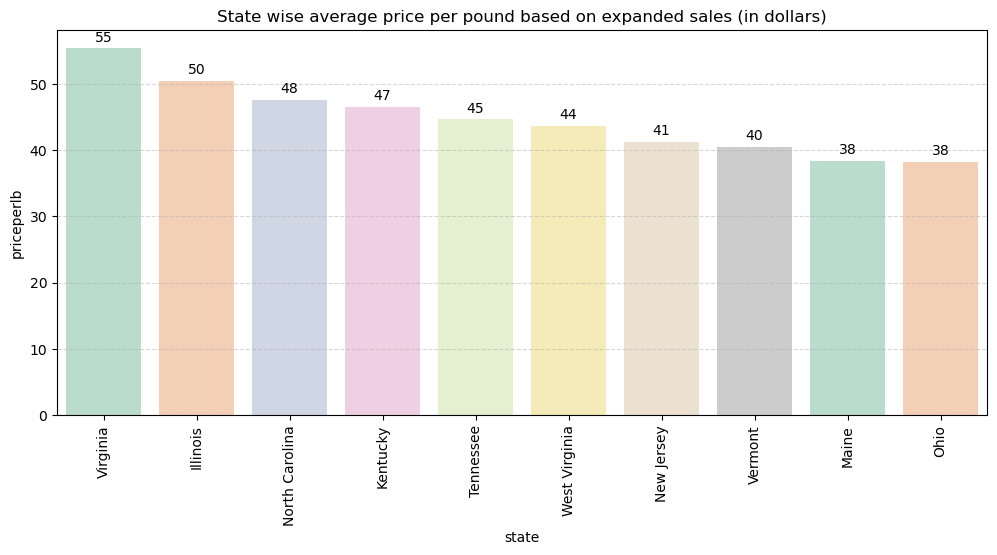

In [21]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=top10_price,x = 'state', y='priceperlb', palette = 'Pastel2');
plt.title('State wise average price per pound based on expanded sales (in dollars)')
for bar in ax.patches: # Print count on top of the bar
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90);

* Across the US priceperlb of honey is 30 and all the above states are producing the honey at higher price than the average value.
* The east region or the southern states of the US have high price of honey.

similarly, let's create another plot for the bottom 10 states.

In [22]:
#Last 10 states having minimum price per pound of honey based on expanded sales
bottom10_price= honeyprod.groupby('state')[['priceperlb']].sum().sort_values('priceperlb', ascending=False).reset_index().tail(10) 
bottom10_price

,state,priceperlb
34,South Dakota,24.80
35,North Dakota,24.56
36,Nevada,24.41
37,Arkansas,24.35
38,Mississippi,23.88
39,Louisiana,23.77
40,New Mexico,19.77
41,South Carolina,16.57
42,Maryland,9.37
43,Oklahoma,8.74


Let's do a representation for bottom 10 states of the US

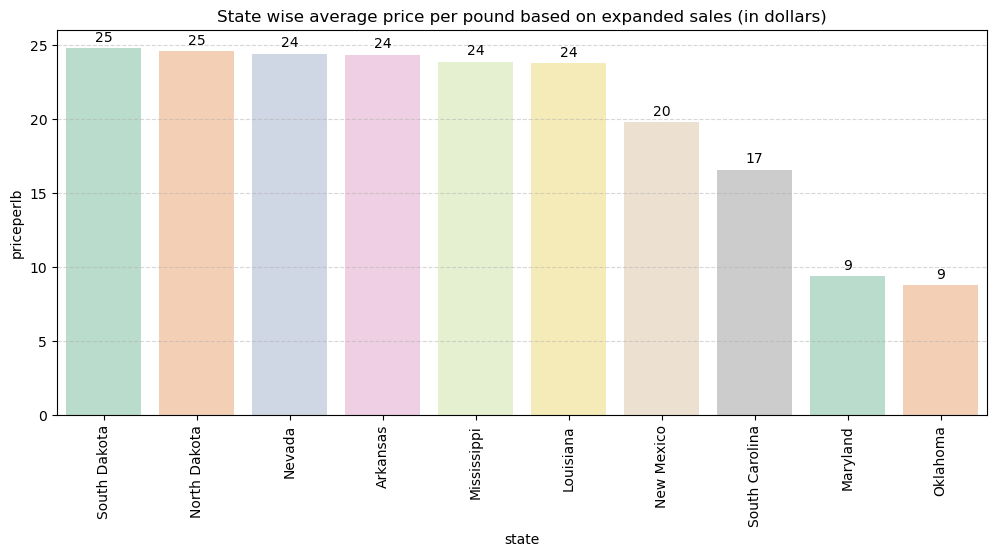

In [23]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=bottom10_price,x = 'state', y='priceperlb', palette = 'Pastel2');
plt.title('State wise average price per pound based on expanded sales (in dollars)')
for bar in ax.patches: # Print count on top of the bar
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90);

*Observations:*
- Virginia is producing the costliest honey followed by Illinois and North Carolina as compared to other states*
- On average Oklahoma is producing the cheapest honey across US followed by Maryland and South Carolina*

Since we have explored various attributes present in the dataset, now let's try to answer the key questions to check the trend across the years. 

**Let's look at the overall trend of honey production in the US over the years**

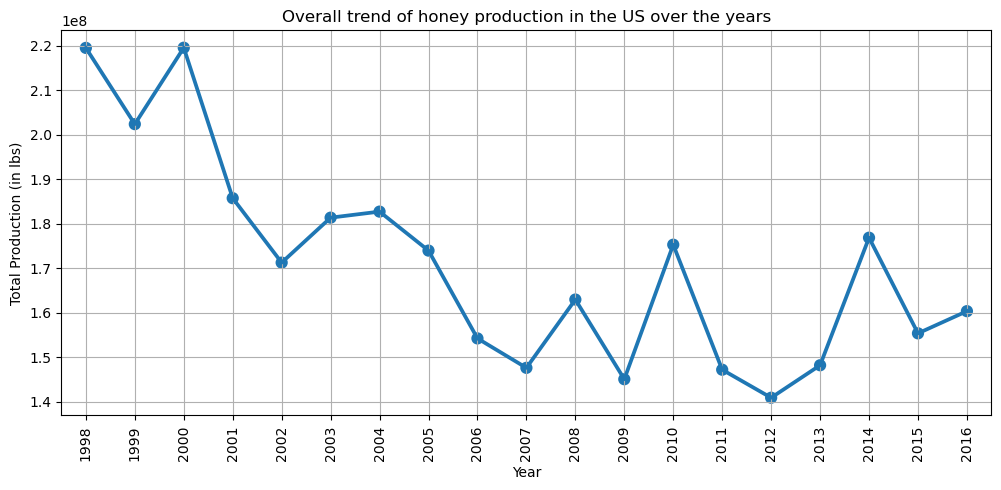

In [24]:
plt.figure(figsize=(12, 5))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.title('Overall trend of honey production in the US over the years')
plt.xlabel('Year')
plt.ylabel('Total Production (in lbs)')
plt.grid(True)
plt.xticks(rotation=90);

*Observations:*
- *The overall honey production in the US has been decreasing over the years*
- *Total honey production = number of colonies * average yield per colony. Let's check if the honey production is decreasing due to one of these factors or both*

**Variation in the number of colonies over the years**

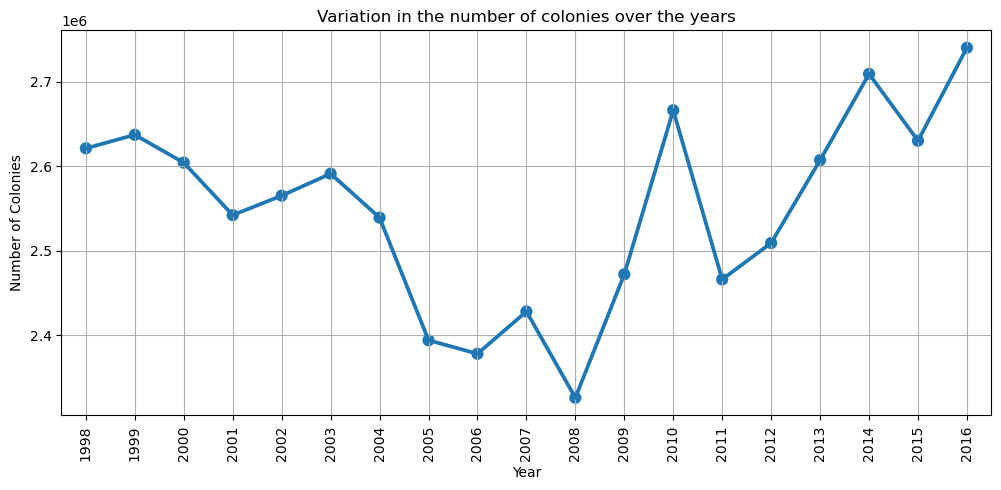

In [25]:
plt.figure(figsize=(12, 5))
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.title('Variation in the number of colonies over the years')
plt.xlabel('Year')
plt.ylabel('Number of Colonies')
plt.grid(True)  
plt.xticks(rotation=90);

*Observations:*
- *The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick after 2008*
- *It is possible that there was some intervention in 2008 that help in increasing the number of honey bee colonies across the country*

**Variation of yield per colony over the years**

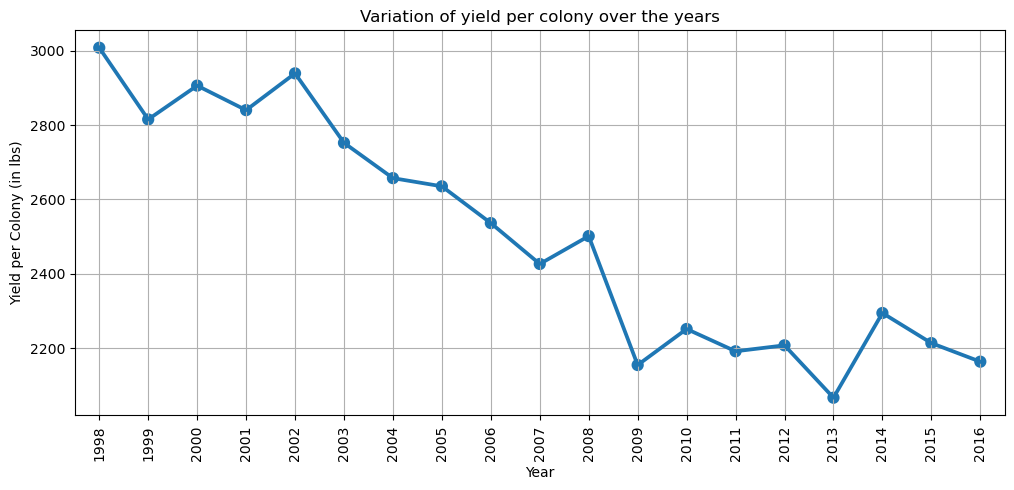

In [26]:
plt.figure(figsize=(12, 5))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.title('Variation of yield per colony over the years')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (in lbs)')
plt.grid(True)
plt.xticks(rotation=90);

*Observations:*
- *In contrast to the number of colonies, the yield per colony has been decreasing since 1998*
- *This indicates that it is not the number of colonies that is causing a decline in total honey production but the yield per colony*

**Let' s look at the production trend at state level**

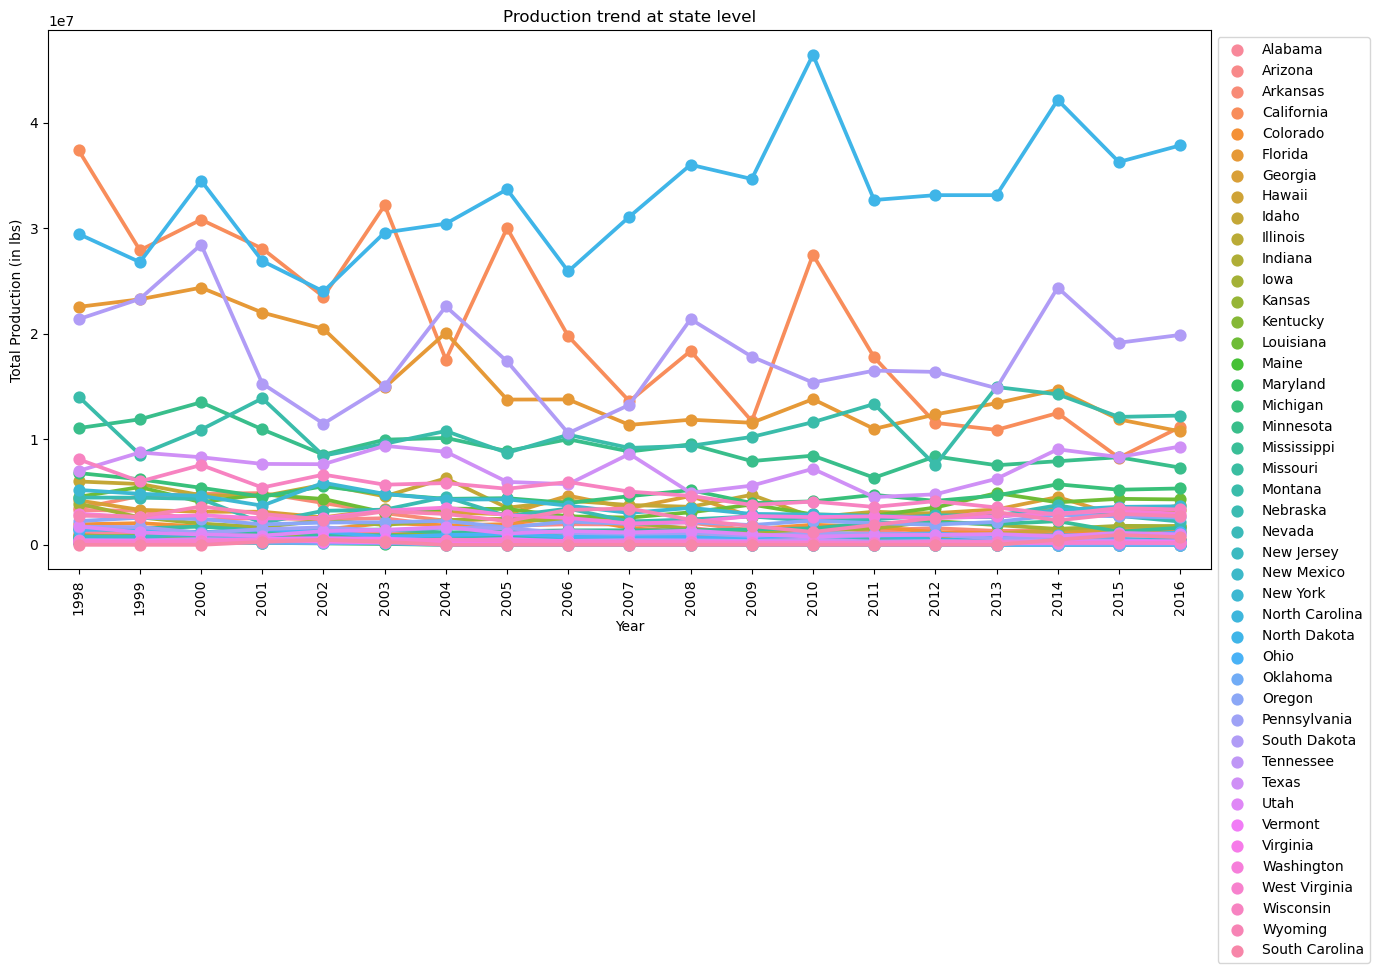

In [27]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.title('Production trend at state level')
plt.xlabel('Year')
plt.ylabel('Total Production (in lbs)') 
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

*Observations:*
- *some states have much higher productions than the others but this plot is a little hard to read*

Let's try plotting each state separately for a better understanding -

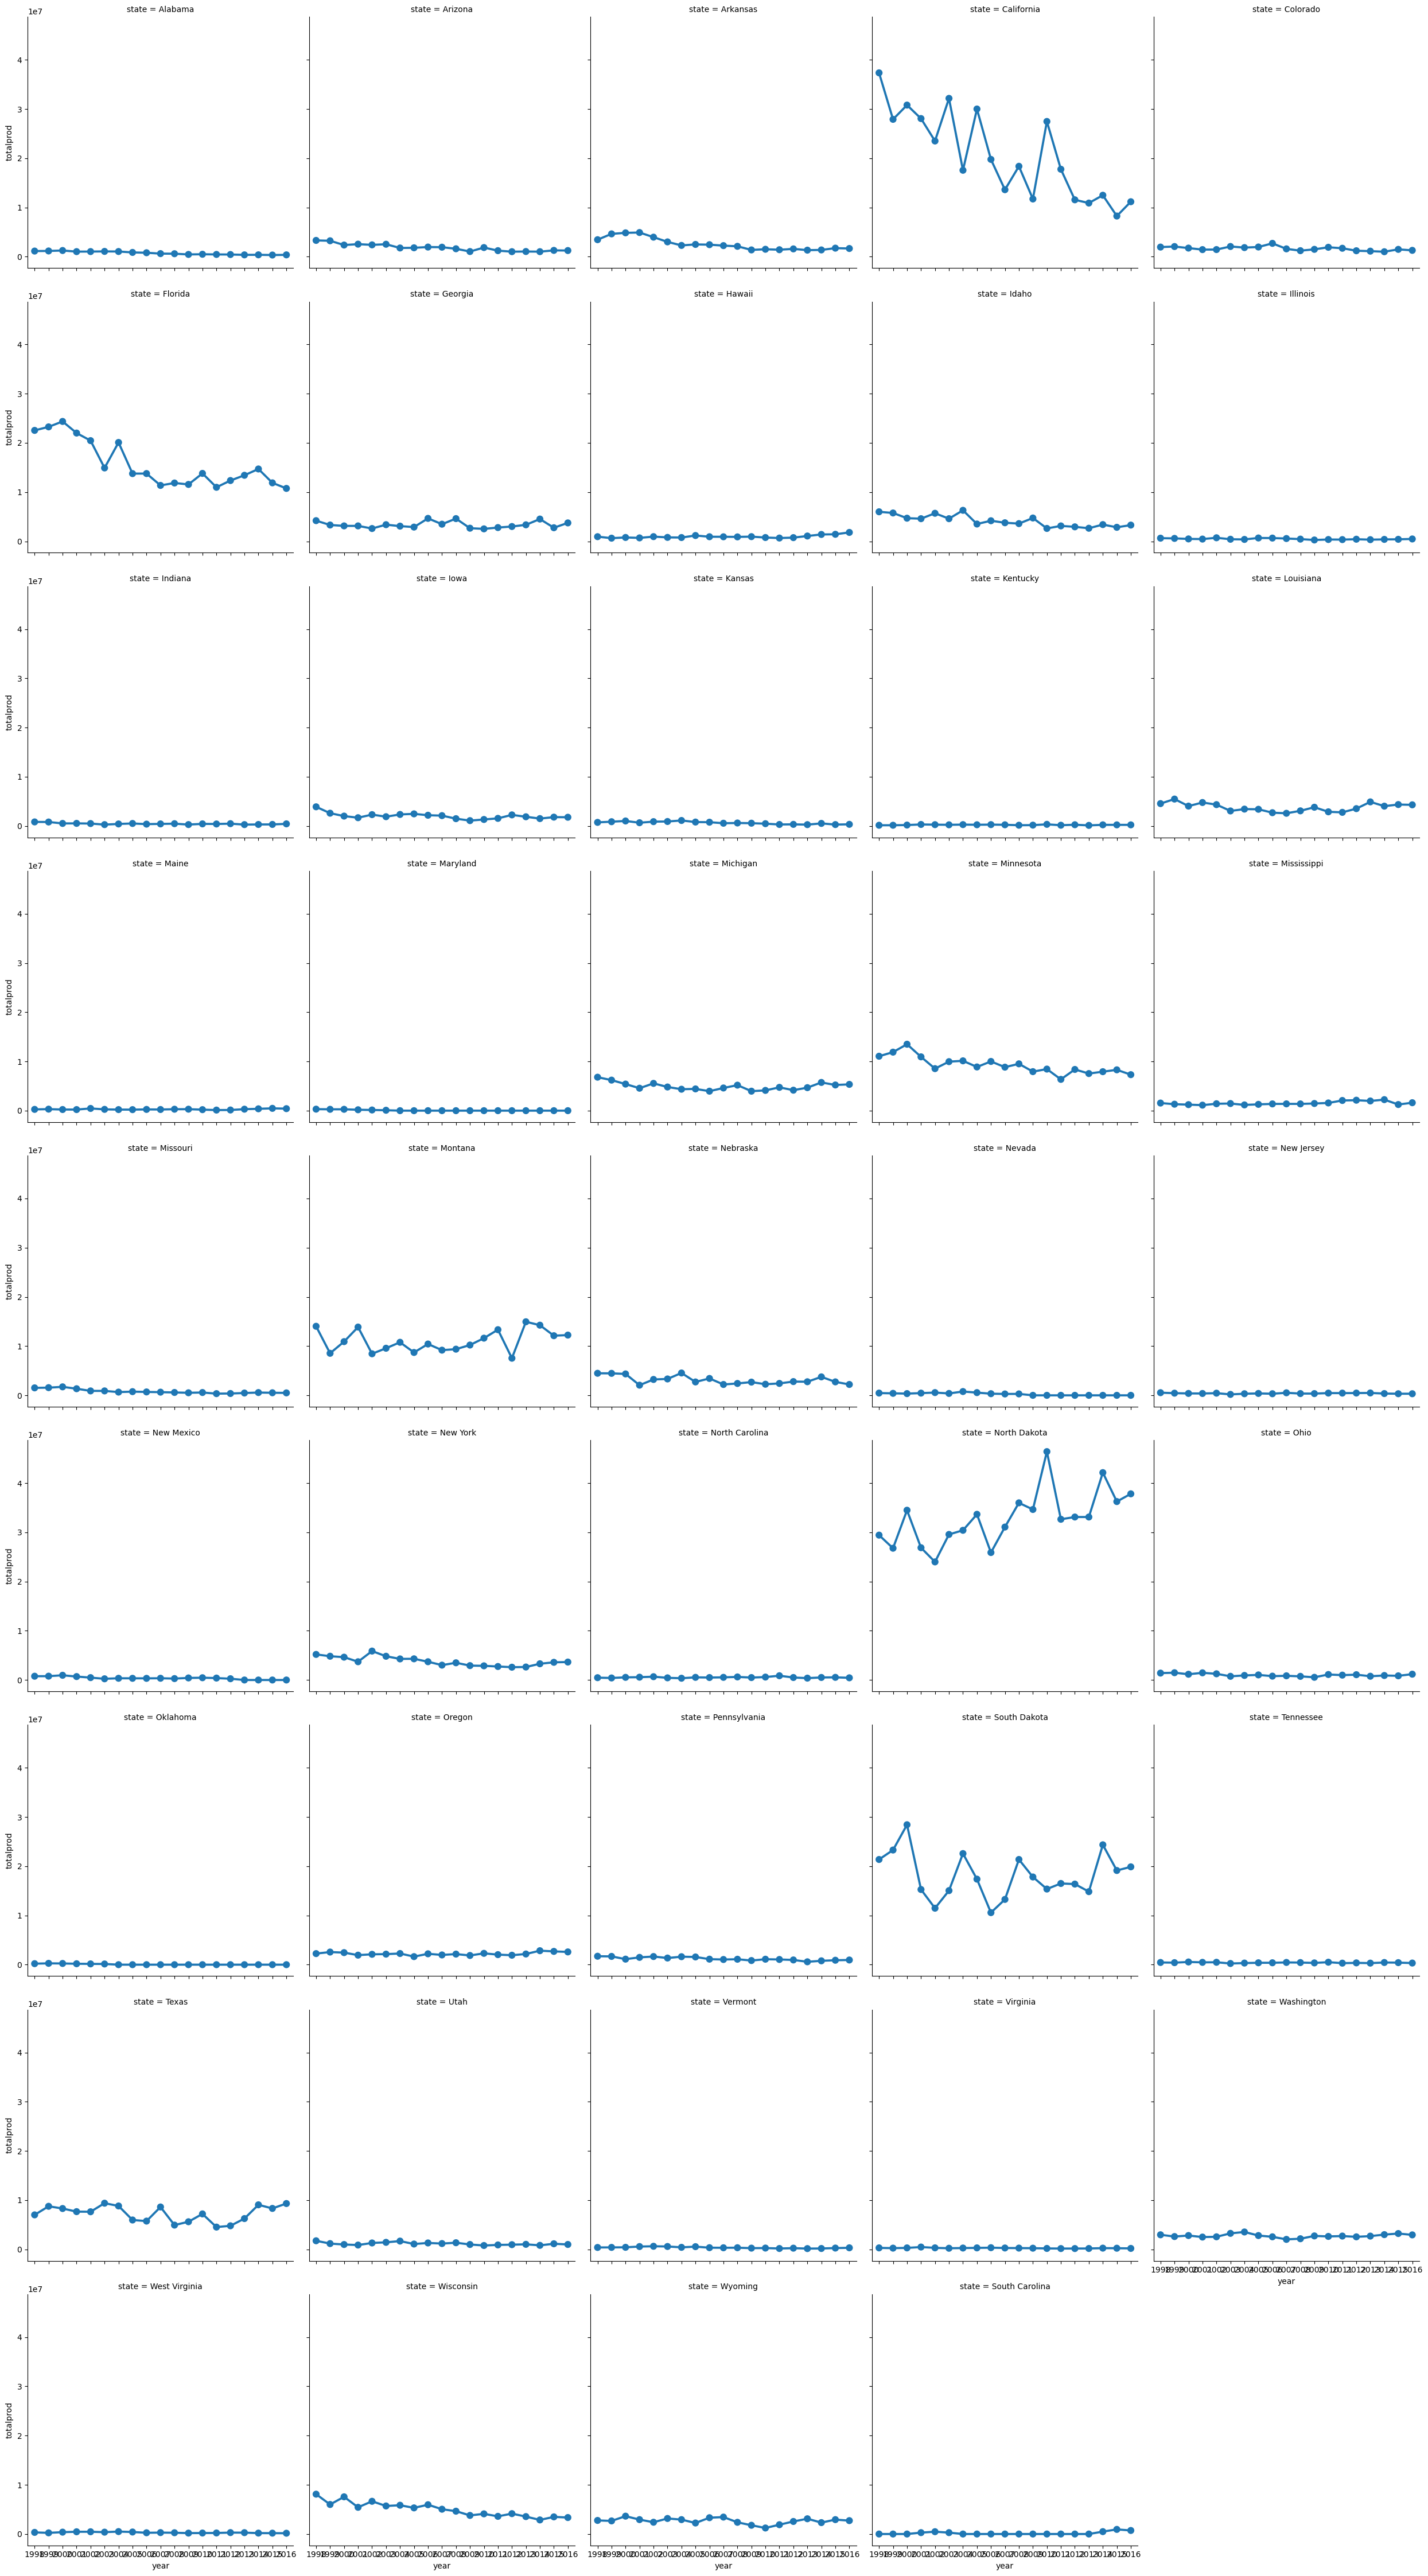

In [28]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
              col_wrap = 5);

*Observations:*
- *The most prominent honey-producing states of the US are - California, Florida, North Dakota and South Dakota and Montana*
- *Unfortunately, honey production in California has seen a steep decline over the years*
- *Florida's total production also has been on a decline* 
- *South Dakota has more or less maintained its levels of production*
- *North Dakota has actually seen an impressive increase in the honey production* 

**Let's look at the yearly trend in number of colonies and yield per colony in the 5 prominent states**

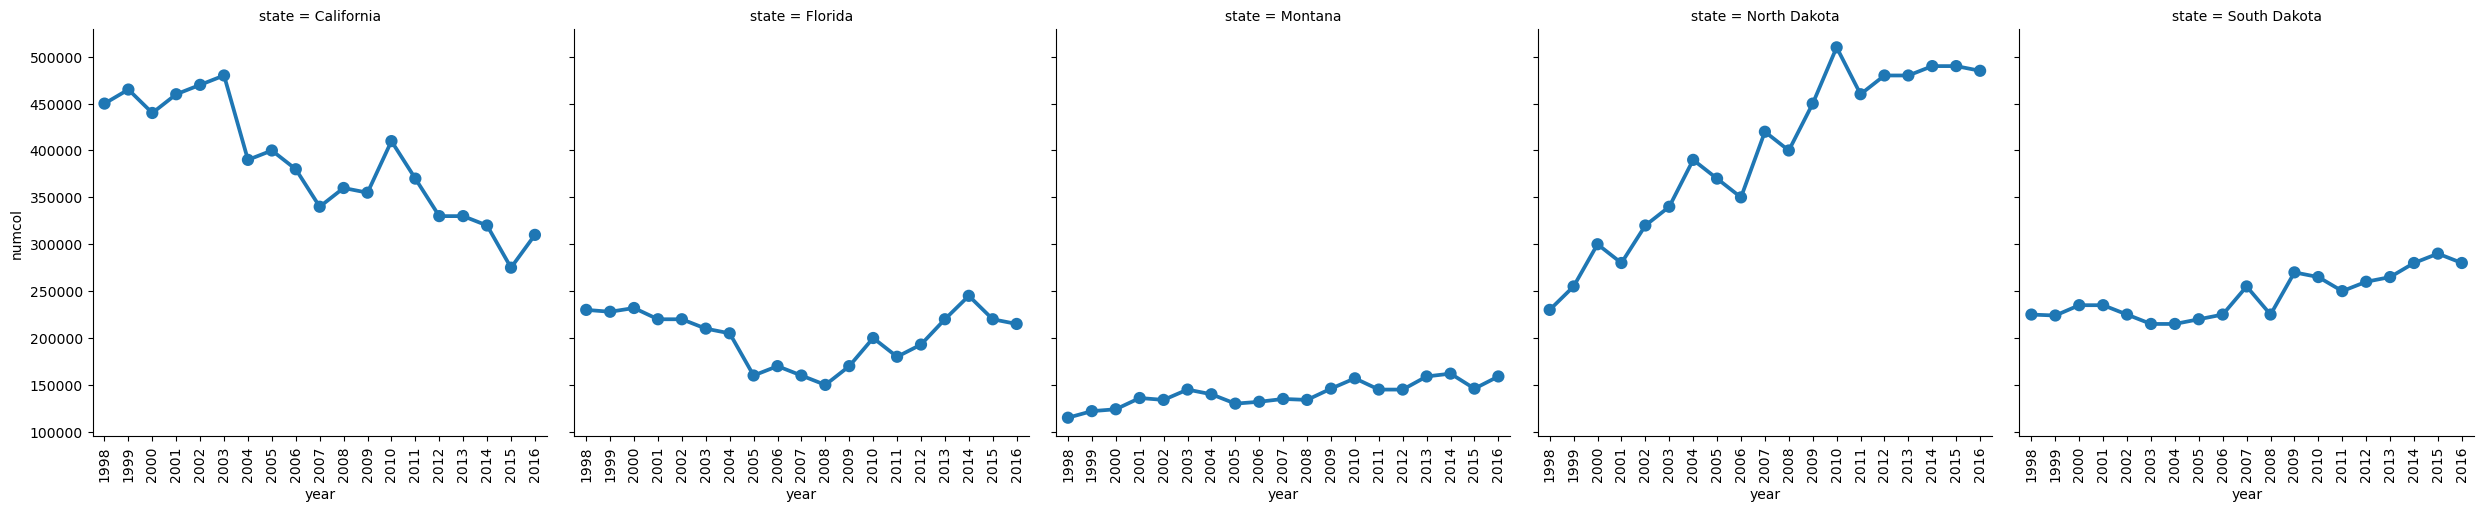

In [29]:
cplot1=sns.catplot(x='year', y='numcol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot1.set_xticklabels(rotation=90);

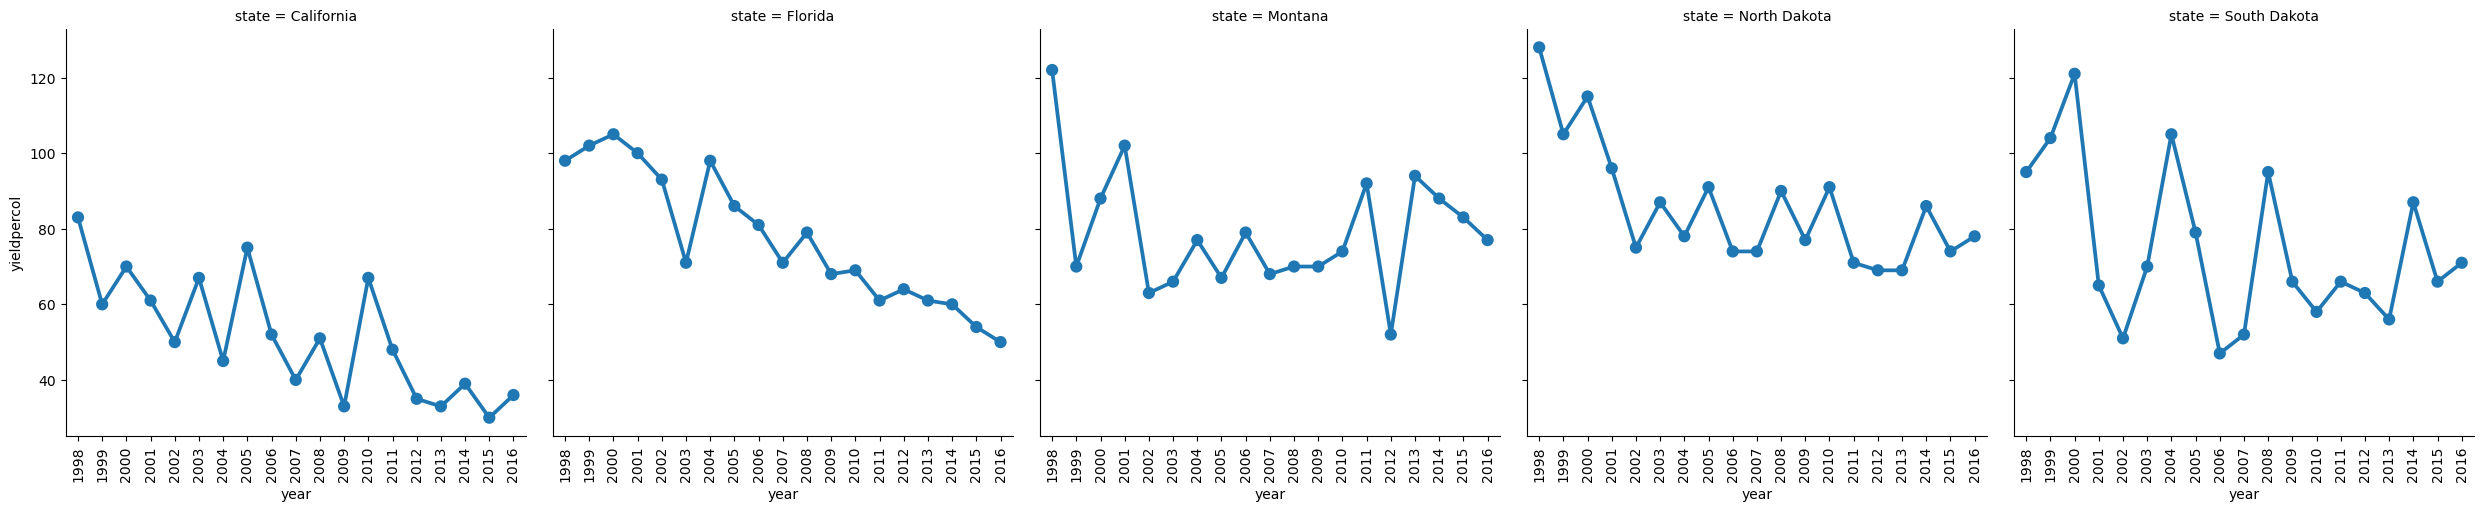

In [30]:
cplot2=sns.catplot(x='year', y='yieldpercol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot2.set_xticklabels(rotation=90);

*Observations:*
- *In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states*
- *If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years*

**Let's look at the average price per pound of honey across states**

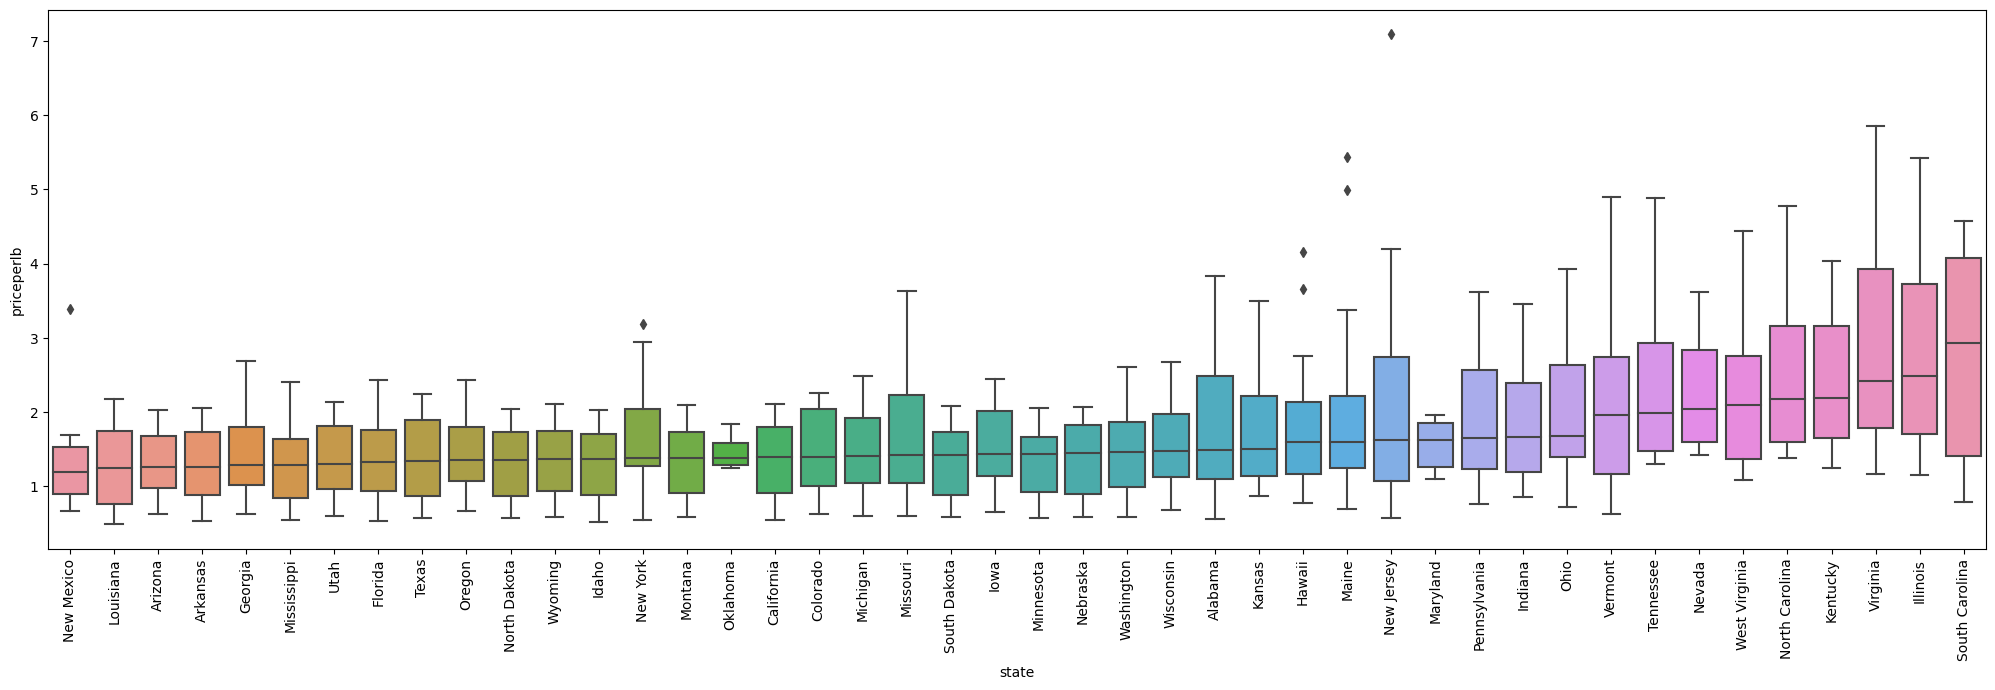

In [31]:
# Calculate median price per state
state_order = honeyprod.groupby('state')['priceperlb'].median().sort_values().index

plt.figure(figsize=(25, 7))
sns.boxplot(data=honeyprod, x="state", y="priceperlb", order=state_order)
plt.xticks(rotation=90)
plt.show()

*Observations:*
- *Virginia has the highest price per pound of honey*
- *The average price per pound of honey in the major honey-producing states is towards the lower end*

**Thank You !!**


---